# **Nba Analysis**
<br>



This notebook seeks to find out if there was any relation between Steph Curry's performance, during his unanimous MVP season, and the quality of popcorn served in the arena he was playing, based on his rating.

In [3]:
pip install nba_api
pip install pandas
pip install json
pip install matplotlib.pyplot
pip install seaborn

SyntaxError: invalid syntax. Perhaps you forgot a comma? (Temp/ipykernel_29844/1341824655.py, line 1)

In [4]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.static import teams
import json
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playergamelogs
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data Using the NBA_Api
<br>

Getting Steph's id

In [5]:
steph = players.find_players_by_full_name('Stephen Curry')

In [6]:
steph_id=steph.pop().get('id')

Getting a list of all the NBA teams

In [7]:
nba_teams = teams.get_teams()
nba_teams
df_teams = pd.json_normalize(nba_teams)

#POPCORN and his games

In [10]:
popcorn_ranking=pd.read_excel('CurryPopcornRankings.xlsx')

Steph's popcorn data taken from: https://data.world/makeovermonday/2019w17

In [17]:
#gamefinder = leaguegamefinder.LeagueGameFinder(player_id_nullable=steph_id)
#games = gamefinder.get_data_frames()[0]
#games.head

In [18]:
#checking if he played all games from https://stackoverflow.com/questions/54426845/how-to-check-if-a-pandas-dataframe-contains-only-numeric-column-wise
#pd.to_numeric(games['MIN'], errors='coerce').notnull().all

Getting all the games for Steph's MVP season

In [11]:
games_logs = playergamelogs.PlayerGameLogs(player_id_nullable=steph_id, season_nullable='2015-16' )

In [12]:
real_logs=games_logs.get_data_frames()[0]
real_logs.head

<bound method NDFrame.head of    SEASON_YEAR  PLAYER_ID    PLAYER_NAME NICKNAME     TEAM_ID  \
0      2015-16     201939  Stephen Curry  Stephen  1610612744   
1      2015-16     201939  Stephen Curry  Stephen  1610612744   
2      2015-16     201939  Stephen Curry  Stephen  1610612744   
3      2015-16     201939  Stephen Curry  Stephen  1610612744   
4      2015-16     201939  Stephen Curry  Stephen  1610612744   
..         ...        ...            ...      ...         ...   
74     2015-16     201939  Stephen Curry  Stephen  1610612744   
75     2015-16     201939  Stephen Curry  Stephen  1610612744   
76     2015-16     201939  Stephen Curry  Stephen  1610612744   
77     2015-16     201939  Stephen Curry  Stephen  1610612744   
78     2015-16     201939  Stephen Curry  Stephen  1610612744   

   TEAM_ABBREVIATION              TEAM_NAME     GAME_ID            GAME_DATE  \
0                GSW  Golden State Warriors  0021501227  2016-04-13T00:00:00   
1                GSW  Golden 

In [13]:
#checking data to ensure he played all the games
#from: https://stackoverflow.com/questions/54426845/how-to-check-if-a-pandas-dataframe-contains-only-numeric-column-wise
print(pd.to_numeric(real_logs['MIN'], errors='coerce').notnull().all)

print(real_logs['MIN'].nsmallest(3))
print(real_logs.columns.values)
real_logs['MATCHUP'].head

<bound method NDFrame._add_numeric_operations.<locals>.all of 0     True
1     True
2     True
3     True
4     True
      ... 
74    True
75    True
76    True
77    True
78    True
Name: MIN, Length: 79, dtype: bool>
48    14.383333
46    26.133333
28    26.303333
Name: MIN, dtype: float64
['SEASON_YEAR' 'PLAYER_ID' 'PLAYER_NAME' 'NICKNAME' 'TEAM_ID'
 'TEAM_ABBREVIATION' 'TEAM_NAME' 'GAME_ID' 'GAME_DATE' 'MATCHUP' 'WL'
 'MIN' 'FGM' 'FGA' 'FG_PCT' 'FG3M' 'FG3A' 'FG3_PCT' 'FTM' 'FTA' 'FT_PCT'
 'OREB' 'DREB' 'REB' 'AST' 'TOV' 'STL' 'BLK' 'BLKA' 'PF' 'PFD' 'PTS'
 'PLUS_MINUS' 'NBA_FANTASY_PTS' 'DD2' 'TD3' 'GP_RANK' 'W_RANK' 'L_RANK'
 'W_PCT_RANK' 'MIN_RANK' 'FGM_RANK' 'FGA_RANK' 'FG_PCT_RANK' 'FG3M_RANK'
 'FG3A_RANK' 'FG3_PCT_RANK' 'FTM_RANK' 'FTA_RANK' 'FT_PCT_RANK'
 'OREB_RANK' 'DREB_RANK' 'REB_RANK' 'AST_RANK' 'TOV_RANK' 'STL_RANK'
 'BLK_RANK' 'BLKA_RANK' 'PF_RANK' 'PFD_RANK' 'PTS_RANK' 'PLUS_MINUS_RANK'
 'NBA_FANTASY_PTS_RANK' 'DD2_RANK' 'TD3_RANK' 'VIDEO_AVAILABLE_FLAG']


<bound method NDFrame.head of 0     GSW vs. MEM
1       GSW @ SAS
2       GSW @ MEM
3     GSW vs. SAS
4     GSW vs. MIN
         ...     
74    GSW vs. LAC
75    GSW vs. MEM
76      GSW @ NOP
77      GSW @ HOU
78    GSW vs. NOP
Name: MATCHUP, Length: 79, dtype: object>

In [14]:
#Getting the teams he played and stats for each game in on df
test_df = real_logs[['MATCHUP', 'PLUS_MINUS','NBA_FANTASY_PTS','PTS', 'TOV', 'PF']]
test_df['MATCHUP'].str[-3:]
test_df['MATCHUP'] = test_df['MATCHUP'].str[-3:]
test_df.head

C:\Users\Sunil\AppData\Local\Temp/ipykernel_29844/433973251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['MATCHUP'] = test_df['MATCHUP'].str[-3:]


<bound method NDFrame.head of    MATCHUP  PLUS_MINUS  NBA_FANTASY_PTS  PTS  TOV  PF
0      MEM          19             63.8   46    2   2
1      SAS           7             52.5   37    4   4
2      MEM          10             40.8   17    2   1
3      SAS          14             49.5   27    3   2
4      MIN           3             56.7   21    3   4
..     ...         ...              ...  ...  ...  ..
74     LAC           7             46.0   31    0   3
75     MEM          37             47.1   30    3   2
76     NOP          16             81.3   53    2   3
77     HOU          12             44.4   25    1   4
78     NOP          12             61.7   40    2   1

[79 rows x 6 columns]>

In [15]:
teams_abrev = df_teams[['abbreviation','full_name']]
#from https://stackoverflow.com/questions/17426292/what-is-the-most-efficient-way-to-create-a-dictionary-of-two-pandas-dataframe-co
city_abrev=pd.Series(teams_abrev.full_name.values,index=teams_abrev.abbreviation).to_dict()
merged_df=test_df
#adding the opposing team name based on the city for each row
merged_df['CITY'] =merged_df['MATCHUP'].map(city_abrev)
print(merged_df.head)


<bound method NDFrame.head of    MATCHUP  PLUS_MINUS  NBA_FANTASY_PTS  PTS  TOV  PF                    CITY
0      MEM          19             63.8   46    2   2       Memphis Grizzlies
1      SAS           7             52.5   37    4   4       San Antonio Spurs
2      MEM          10             40.8   17    2   1       Memphis Grizzlies
3      SAS          14             49.5   27    3   2       San Antonio Spurs
4      MIN           3             56.7   21    3   4  Minnesota Timberwolves
..     ...         ...              ...  ...  ...  ..                     ...
74     LAC           7             46.0   31    0   3    Los Angeles Clippers
75     MEM          37             47.1   30    3   2       Memphis Grizzlies
76     NOP          16             81.3   53    2   3    New Orleans Pelicans
77     HOU          12             44.4   25    1   4         Houston Rockets
78     NOP          12             61.7   40    2   1    New Orleans Pelicans

[79 rows x 7 columns]>


C:\Users\Sunil\AppData\Local\Temp/ipykernel_29844/2950820520.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['CITY'] =merged_df['MATCHUP'].map(city_abrev)


In [16]:
print(popcorn_ranking.head)
#spaces are scary

#woo is the df 
woo = popcorn_ranking.rename(columns={"TOTAL SCORE": "TOTAL_SCORE"}, errors="raise")
woo.columns.values


<bound method NDFrame.head of                            TEAM                       ARENA  FRESHNESS  \
0              Dallas Mavericks    American Airlines Center          5   
1                 Brooklyn Nets             Barclays Center          4   
2                    Miami Heat     American Airlines Arena          5   
3         Portland Trailblazers                 Moda Center          4   
4              Sacramento Kings             Golden 1 Center          2   
5               Toronto Raptors            Scotiabank Arena          3   
6               Houston Rockets               Toyota Center          3   
7         Oklahoma City Thunder     Chesapeake Energy Arena          4   
8         Golden State Warriors                Oracle Arena          2   
9          New York City Knicks       Madison Square Garden          3   
10               Indiana Pacers     Bankers Life Fieldhouse          3   
11         New Orleans Pelicans        Smoothie King Center          3   
12      

array(['TEAM', 'ARENA', 'FRESHNESS', 'SALTINESS', 'CRUNCHINESS', 'BUTTER',
       'PRESENTATION', 'TOTAL_SCORE'], dtype=object)

In [18]:
#combining all the popcorn ratings and games together
  #yes this is the best way to do it, copying and pasting code is always the best practice


popcorn_city=pd.Series(woo.TOTAL_SCORE.values,index=woo.TEAM).to_dict()
popcorn_city['Los Angeles Clippers']=popcorn_city['Los Angeles Clippers/Lakers']
popcorn_city['Los Angeles Lakes']=popcorn_city['Los Angeles Clippers/Lakers']

popcorn_city_FRESHNESS=pd.Series(woo.FRESHNESS.values,index=woo.TEAM).to_dict()
popcorn_city_FRESHNESS['Los Angeles Clippers']=popcorn_city_FRESHNESS['Los Angeles Clippers/Lakers']
popcorn_city_FRESHNESS['Los Angeles Lakes']=popcorn_city_FRESHNESS['Los Angeles Clippers/Lakers']

popcorn_city_SALTINESS=pd.Series(woo.SALTINESS.values,index=woo.TEAM).to_dict()
popcorn_city_SALTINESS['Los Angeles Clippers']=popcorn_city_SALTINESS['Los Angeles Clippers/Lakers']
popcorn_city_SALTINESS['Los Angeles Lakes']=popcorn_city_SALTINESS['Los Angeles Clippers/Lakers']

popcorn_city_CRUNCHINESS=pd.Series(woo.CRUNCHINESS.values,index=woo.TEAM).to_dict()
popcorn_city_CRUNCHINESS['Los Angeles Clippers']=popcorn_city_CRUNCHINESS['Los Angeles Clippers/Lakers']
popcorn_city_CRUNCHINESS['Los Angeles Lakes']=popcorn_city_CRUNCHINESS['Los Angeles Clippers/Lakers']

popcorn_city_BUTTER=pd.Series(woo.BUTTER.values,index=woo.TEAM).to_dict()
popcorn_city_BUTTER['Los Angeles Clippers']=popcorn_city_BUTTER['Los Angeles Clippers/Lakers']
popcorn_city_BUTTER['Los Angeles Lakes']=popcorn_city_BUTTER['Los Angeles Clippers/Lakers']

popcorn_city_PRESENTATION=pd.Series(woo.PRESENTATION.values,index=woo.TEAM).to_dict()
popcorn_city_PRESENTATION['Los Angeles Clippers']=popcorn_city_PRESENTATION['Los Angeles Clippers/Lakers']
popcorn_city_PRESENTATION['Los Angeles Lakes']=popcorn_city_PRESENTATION['Los Angeles Clippers/Lakers']


merged_df['POPCORN_RANKING'] =merged_df['CITY'].map(popcorn_city)
merged_df['POPCORN_FRESHNESS'] =merged_df['CITY'].map(popcorn_city_FRESHNESS)
merged_df['POPCORN_SALTINESS'] =merged_df['CITY'].map(popcorn_city_SALTINESS)
merged_df['POPCORN_CRUNCHINESS'] =merged_df['CITY'].map(popcorn_city_CRUNCHINESS)
merged_df['POPCORN_BUTTER'] =merged_df['CITY'].map(popcorn_city_BUTTER)
merged_df['POPCORN_PRESENTATION'] =merged_df['CITY'].map(popcorn_city_PRESENTATION)
print(merged_df.head)

<bound method NDFrame.head of    MATCHUP  PLUS_MINUS  NBA_FANTASY_PTS  PTS  TOV  PF                    CITY  \
0      MEM          19             63.8   46    2   2       Memphis Grizzlies   
1      SAS           7             52.5   37    4   4       San Antonio Spurs   
2      MEM          10             40.8   17    2   1       Memphis Grizzlies   
3      SAS          14             49.5   27    3   2       San Antonio Spurs   
4      MIN           3             56.7   21    3   4  Minnesota Timberwolves   
..     ...         ...              ...  ...  ...  ..                     ...   
74     LAC           7             46.0   31    0   3    Los Angeles Clippers   
75     MEM          37             47.1   30    3   2       Memphis Grizzlies   
76     NOP          16             81.3   53    2   3    New Orleans Pelicans   
77     HOU          12             44.4   25    1   4         Houston Rockets   
78     NOP          12             61.7   40    2   1    New Orleans Pelicans  

C:\Users\Sunil\AppData\Local\Temp/ipykernel_29844/3924277572.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['POPCORN_RANKING'] =merged_df['CITY'].map(popcorn_city)
C:\Users\Sunil\AppData\Local\Temp/ipykernel_29844/3924277572.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['POPCORN_FRESHNESS'] =merged_df['CITY'].map(popcorn_city_FRESHNESS)
C:\Users\Sunil\AppData\Local\Temp/ipykernel_29844/3924277572.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

#Displaying data

In [19]:
#DATA TIME
merged_df.columns.values

array(['MATCHUP', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'PTS', 'TOV', 'PF',
       'CITY', 'POPCORN_RANKING', 'POPCORN_FRESHNESS',
       'POPCORN_SALTINESS', 'POPCORN_CRUNCHINESS', 'POPCORN_BUTTER',
       'POPCORN_PRESENTATION'], dtype=object)

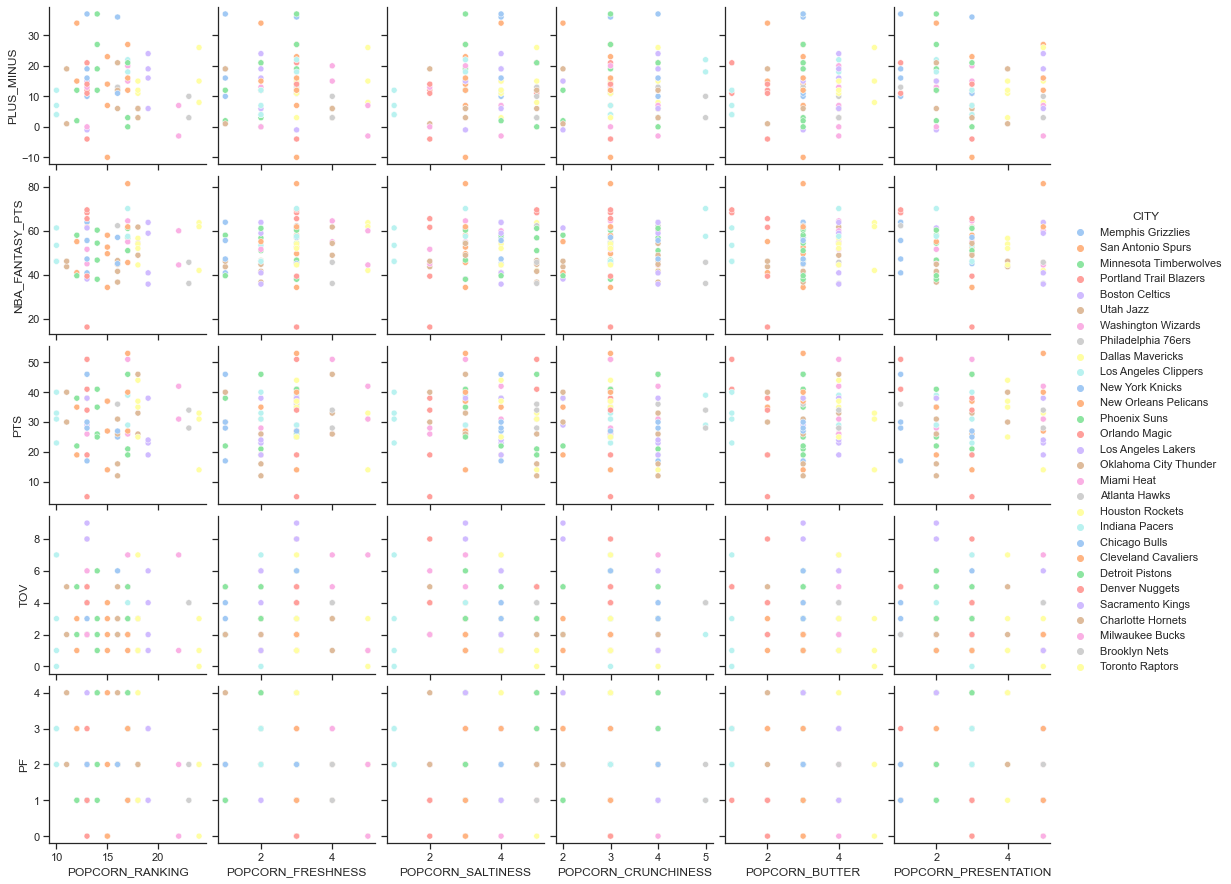

In [20]:
#thanks jack
sns.set(style="ticks")
sns.pairplot(merged_df, x_vars=['POPCORN_RANKING','POPCORN_FRESHNESS','POPCORN_SALTINESS','POPCORN_CRUNCHINESS','POPCORN_BUTTER', 'POPCORN_PRESENTATION'], y_vars=['PLUS_MINUS','NBA_FANTASY_PTS','PTS','TOV','PF'], palette = 'pastel', hue="CITY", height=2.5)
plt.show()

"From the above graphs it doesn't look like there's a strong correlation" - Sunil's analysis. 
The end!